In [25]:
#packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
#setup plot figures
figsize = (10, 10)
plt.style.use('seaborn-v0_8-whitegrid')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [107]:
font = {
    "font.size" : 24,
    "font.weight":"bold", 
}

### ACC, APL & Small Worldness

In [108]:
paths = [{"marker": 'o',"label": "gsw", "path": "results/gsw-ppo/result/history0.txt"},
         {"marker":'^',"label": "nsw", "path":"results/nsw-ppo/result/history0.txt"}, 
         {"marker":'x',"label": "ppo", "path":"results/ppo/result/history0.txt"}]

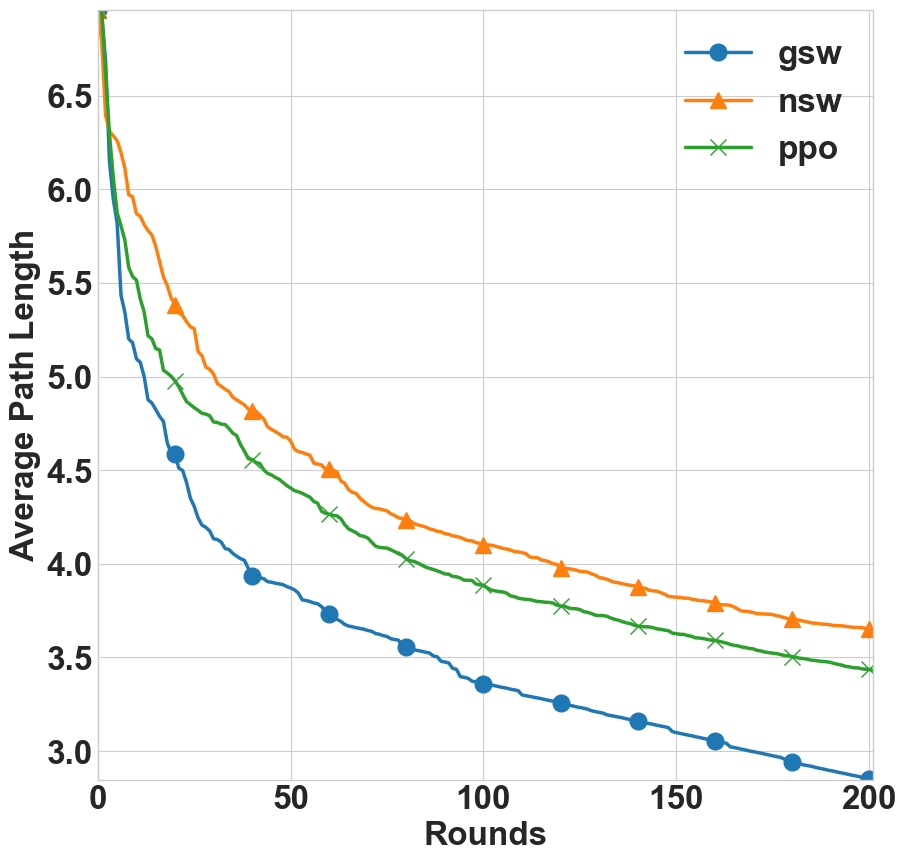

In [111]:
plt.figure(figsize=figsize)
plt.rcParams.update(**font)
# plt.gca().set_axis_off()
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#             hspace = 0, wspace = 0)
plt.margins(0,0)
for path in paths:
# path = paths[0]
	df = pd.read_csv(path["path"])
	plt.plot(df['no.'], df['apl'],marker = path['marker'] ,label =path["label"],lw = 2.5, markevery=20, markersize=12)
plt.legend()
plt.xlabel("Rounds", fontsize = 24,  weight="bold")
plt.ylabel("Average Path Length", fontsize=24,weight ="bold")
# plt.title("APL v/s round")
plt.savefig(fname="results/final/apl.png", format="png")
plt.savefig(fname="results/final/eps/apl.eps",format="eps")

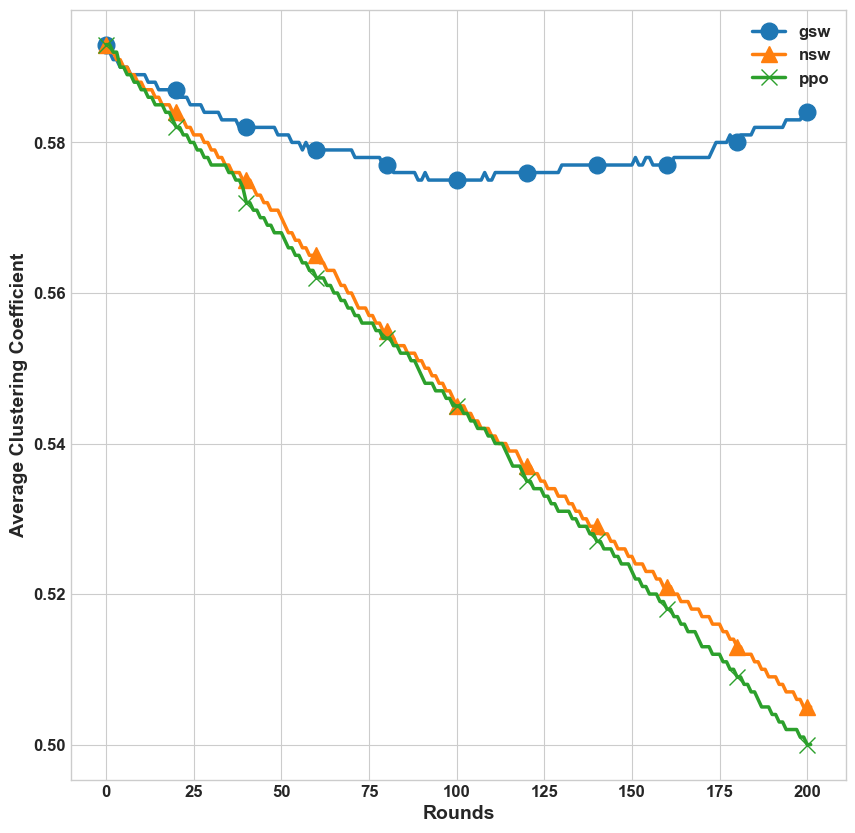

In [65]:
plt.figure(figsize=figsize)
for path in paths:
# path = paths[0]
	df = pd.read_csv(path["path"])
	plt.plot(df['no.'], df['acc'],marker = path['marker'] ,label =path["label"],lw = 2.5, markevery=20,markersize=12)
plt.legend()
plt.xlabel("Rounds",fontsize = 14,  weight="bold")
plt.ylabel("Average Clustering Coefficient",fontsize = 14,  weight="bold")
# plt.title("ACC v/s rounds")
plt.savefig(fname="results/final/ACC.png", format="png")
plt.savefig(fname="results/final/eps/acc.eps",format="eps")

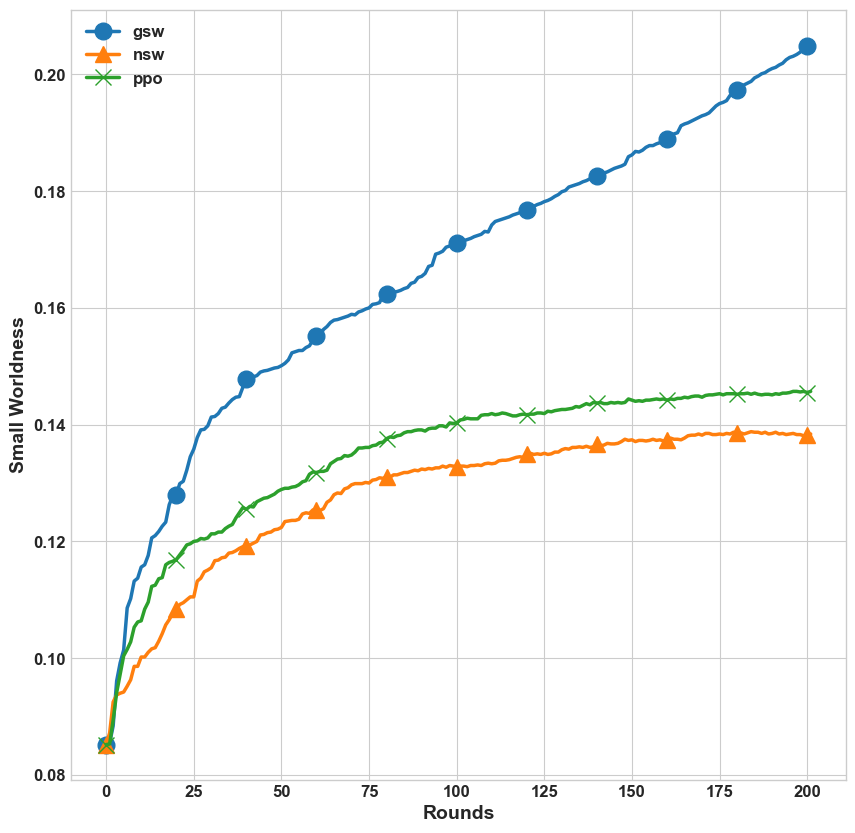

In [66]:
plt.figure(figsize=figsize)
plt.rcParams.update(**font)
for path in paths:
	df = pd.read_csv(path["path"])
	plt.plot(df['no.'], df['small_worldness'],marker = path['marker'] ,label =path["label"],lw = 2.5, markevery=20,markersize=12)
plt.legend()
plt.xlabel("Rounds", weight = "bold", fontsize=14)
plt.ylabel("Small Worldness",weight = "bold", fontsize=14)
plt.savefig(fname="results/final/Small Worldness.png", format="png")
plt.savefig(fname="results/final/eps/Small Worldness.eps", format="eps")

## Simulation Results

In [67]:
paths = [
    {
        "marker": 'o',
    	"label": "gsw", 
        "ppath": "results/gsw-ppo/result/",
		"direct-cl": "direct/direct-cl-performance.npy",
		"direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
        
    },
	{
        "marker":'^',
        "label": "nsw", 
        "ppath":"results/nsw-ppo/result/",
        "direct-cl": "direct/direct-cl-performance.npy",
        "direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
		
    }, 
	{	
        "marker":'x',
        "label": "ppo", 
        "ppath":"results/ppo/result/",
        "direct-cl": "direct/direct-cl-performance.npy",
        "direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
		
    },
	{	
        "marker":'s',
        "label": "conventional", 
        "ppath":"results/conventional/result/",
		"direct-cl": "direct/direct-cl-performance.npy",
		"direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/fl-performance.npy",
		"leach": "",
		
    },
]

In [68]:
from itertools import zip_longest

### Latency

For Centralised Learning

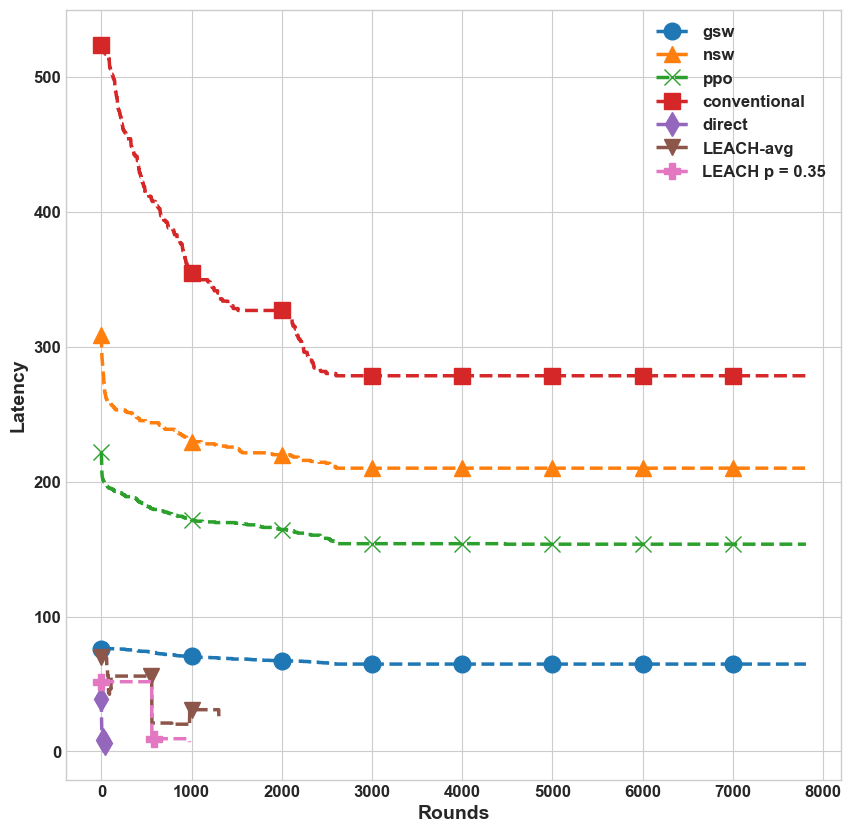

In [75]:
plt.figure(figsize=(10,10))
plt.rcParams.update(**font)
for path in paths:
	p = path["ppath"] + path["multihop-cl"]
	df = np.load(p, allow_pickle=True).item()
	# x = np.linspace(0, 7814, 7814)
	plt.plot( df['latency'], marker = path['marker'], lw=2.5, markersize=12,label = path['label'], markevery=1000, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-cl"]
df = np.load(p, allow_pickle=True).item()
# x = np.linspace(0, 7814, 7814)
plt.plot( df['latency'], marker = 'd', lw=2.5,markersize = 12,label = "direct", markevery=20, linestyle = 'dashed')

P = [0.03, 0.3, 0.7, 0.07, 0.35, 0.45]
P.sort()
l = []
for p in P:
	path = "results/conventional/result/leach/"+ str(p) + "/cl-performance.npy"
	df = pd.DataFrame(np.load(path, allow_pickle=True).item())
	l.append(df['latency'].values.tolist())
	# l.append([x[-1] for x in df['throughput'].values.tolist()])
	# plt.plot(l[-1], label = str(p))
outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, marker = 'v', lw=2.5,markersize = 12,linestyle = 'dashed', label = "LEACH-avg", markevery = 0.1)
plt.plot(l[4], marker='P', lw=2.5,markersize = 12,linestyle = 'dashed', label='LEACH p = 0.35', markevery = 0.1)

plt.xlabel("Rounds", weight = "bold", fontsize=14)
plt.ylabel("Latency", weight = "bold", fontsize=14)
# plt.title("Latency v/s rounds in Centralised Learning")
plt.legend()
# plt.savefig(fname="results/final/Latency_v_rounds_cl.svg", format="svg")
plt.savefig(fname="results/final/Latency-cl.png", format="png")
plt.savefig(fname="results/final/eps/Latency-cl.eps", format="eps")

Federated Learning

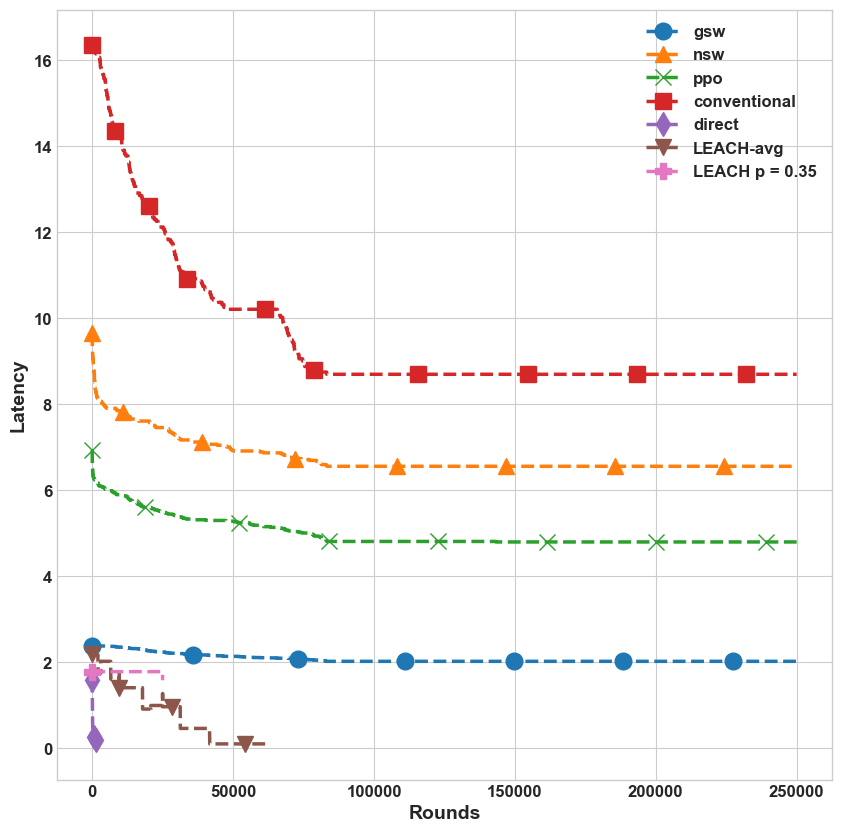

In [85]:
plt.figure(figsize=(10,10))
plt.rcParams.update(**font)
for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['latency']))]
	# print(path['label'], len(x), len(l['latency']))
	plt.plot(x, l['latency'], marker = path['marker'], lw=2.5,markersize=12, label = path['label'], markevery=0.1, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-fl"]
df = np.load(p, allow_pickle=True).item()
x = np.linspace(0, 1755, 1755)
plt.plot( df['latency'], marker = 'd', lw=2.5,markersize = 12,label = "direct", markevery=700, linestyle = 'dashed')

P = [0.03, 0.3, 0.7, 0.07, 0.35, 0.45]
P.sort()
l = []
for p in P:
	path = "results/conventional/result/leach/"+ str(p) + "/fl-performance.npy"
	df = pd.DataFrame(np.load(path, allow_pickle=True).item())
	l.append(df['latency'].values.tolist())
	# l.append([x[-1] for x in df['throughput'].values.tolist()])
	# plt.plot(l[-1], label = str(p))
outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, marker = 'v', lw=2.5,markersize = 12,linestyle = 'dashed', label = "LEACH-avg", markevery = 0.1)
plt.plot(l[4], marker='P', lw=2.5,markersize = 12,linestyle = 'dashed', label='LEACH p = 0.35', markevery = 0.1)

plt.xlabel("Rounds", weight = "bold", fontsize=14)
plt.ylabel("Latency",weight = "bold", fontsize=14)
# plt.title("Latency v/s rounds in Federated Learning")
plt.legend()
plt.savefig(fname="results/final/Latency-fl.png", format="png")
plt.savefig(fname="results/final/eps/Latency-fl.eps", format="eps")


### Energy

Centralised Learning

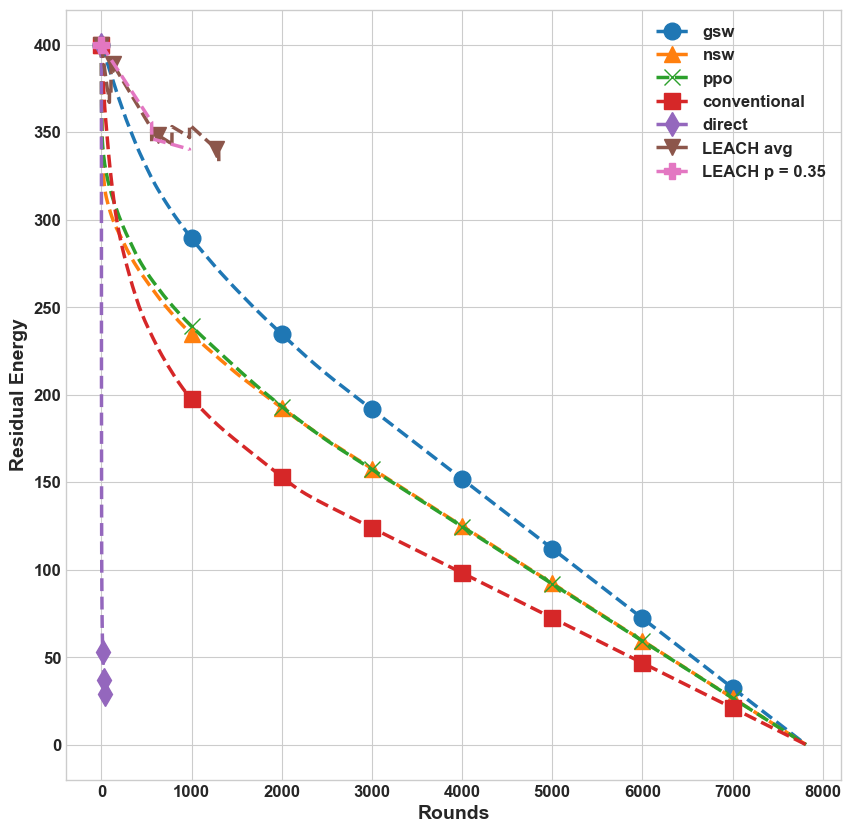

In [93]:
plt.figure(figsize=(10,10))
plt.rcParams.update(**font)
for path in paths:
	p = path["ppath"] + path["multihop-cl"]
	df = np.load(p, allow_pickle=True).item()
	# x = np.linspace(0, 7814, 7814)
	plt.plot( df['energy'], marker = path['marker'], lw=2.5, markersize=12,label = path['label'], markevery=1000, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-cl"]
df = np.load(p, allow_pickle=True).item()
df['energy'].insert(0,400)
# x = np.linspace(0, 7814, 7814)
plt.plot( df['energy'], marker = 'd', lw=2.5, markersize=12,label = "direct", markevery=15, linestyle = 'dashed')


P = [0.03, 0.3, 0.7, 0.07, 0.35, 0.45]
P.sort()
l = []
for p in P:
	path = "results/conventional/result/leach/"+ str(p) + "/cl-performance.npy"
	df = pd.DataFrame(np.load(path, allow_pickle=True).item())
	l.append(df['energy'].values.tolist())
	# l.append([x[-1] for x in df['throughput'].values.tolist()])
	# plt.plot(l[-1], label = str(p))
outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, marker = 'v',lw=2.5, markersize=12, linestyle = 'dashed', label = "LEACH avg", markevery = 0.1)
plt.plot(l[4], marker='P',lw=2.5, markersize=12, linestyle = 'dashed', label='LEACH p = 0.35', markevery = 0.75)


plt.xlabel("Rounds", weight = "bold", fontsize=14)
plt.ylabel("Residual Energy",weight = "bold", fontsize=14)
plt.legend()
plt.savefig(fname="results/final/Energy-cl.png", format="png")
plt.savefig(fname="results/final/eps/Energy-cl.eps", format="eps")

Federated Learning

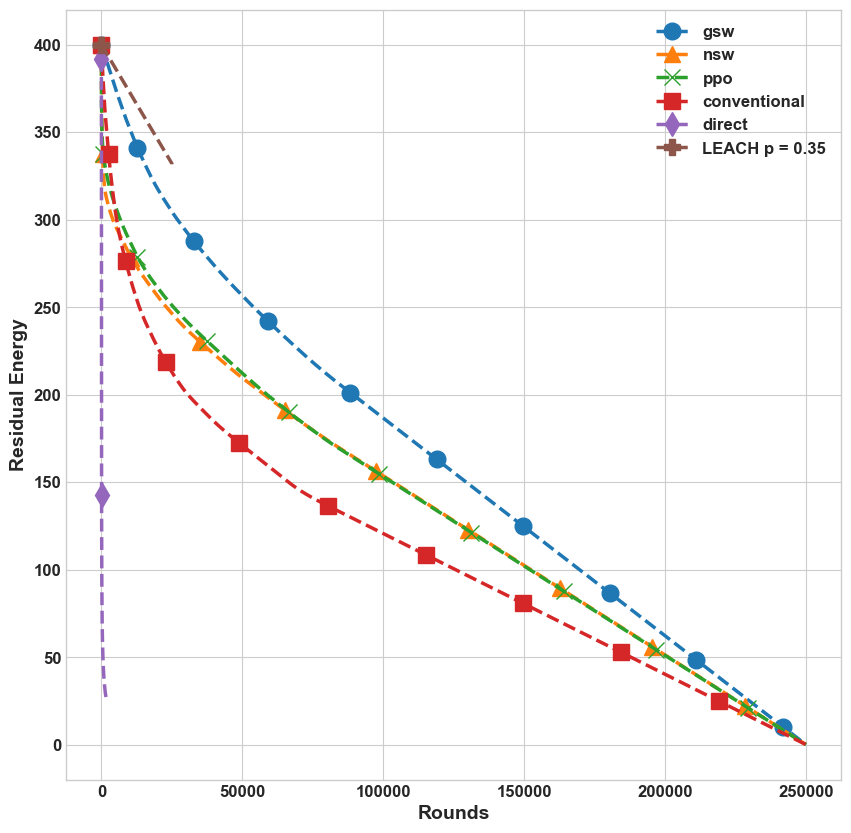

In [94]:
plt.figure(figsize=(10,10))
plt.rcParams.update(**font)
for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	df = np.load(p, allow_pickle=True).item()
	# x = np.linspace(0, 7814, 7814)
	plt.plot(df['energy'], marker = path['marker'],lw=2.5, markersize=12,label = path['label'], markevery=0.1, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-fl"]
df = np.load(p, allow_pickle=True).item()
# x = np.linspace(0, 7814, 7814)
plt.plot( df['energy'], marker = 'd', lw=2.5, markersize=12,label = "direct", markevery=0.4, linestyle = 'dashed')


P = [0.03, 0.3, 0.7, 0.07, 0.35, 0.45]
P.sort()
l = []
for p in P:
	path = "results/conventional/result/leach/"+ str(p) + "/fl-performance.npy"
	df = pd.DataFrame(np.load(path, allow_pickle=True).item())
	l.append(df['energy'].values.tolist())
	# l.append([x[-1] for x in df['throughput'].values.tolist()])
	# plt.plot(l[-1], label = str(p))
# outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
# plt.plot(outcome, marker = 'v', linestyle = 'dashed', label = "LEACH avg", markevery = 0.1)
plt.plot(l[4], marker='P', linestyle = 'dashed', lw=2.5, markersize=12,label='LEACH p = 0.35', markevery = 0.75)



plt.xlabel("Rounds", weight = "bold", fontsize=14)
plt.ylabel("Residual Energy", weight = "bold", fontsize=14)
# plt.title("Energy v/s rounds in Federated Learning")
plt.legend()
plt.savefig(fname="results/final/Energy-fl.png", format="png")
plt.savefig(fname="results/final/eps/Energy-fl.eps", format="eps")
# plt.savefig(fname="results/final/Energy_v_rounds_fl.svg", format="svg")

### Throughput

Centralised Learning

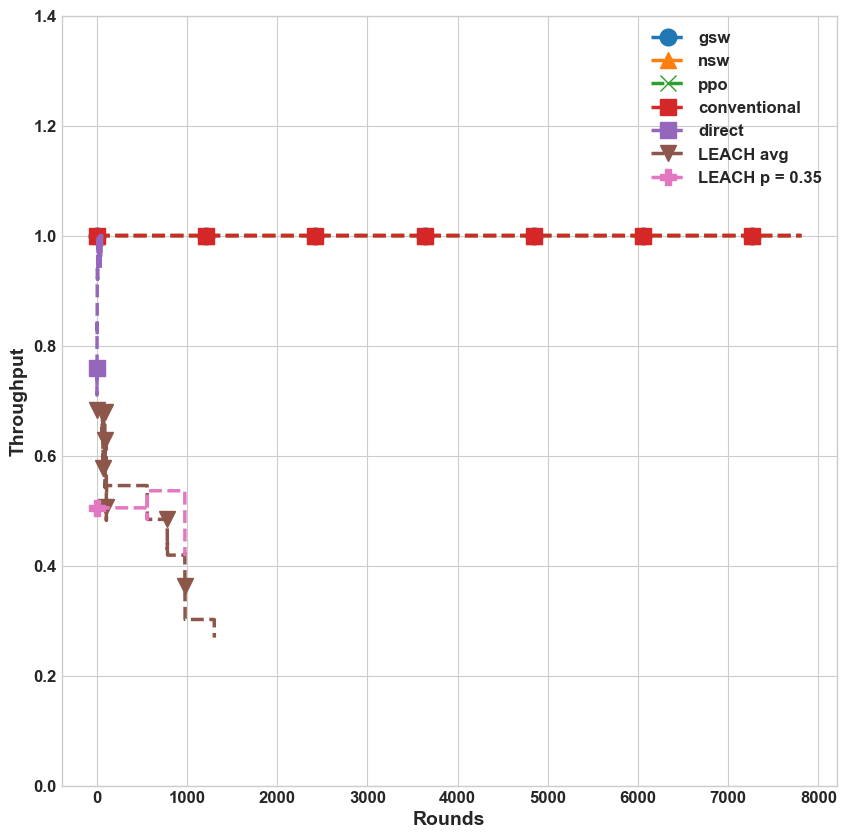

In [91]:
cnt = 0
plt.figure(figsize=(10,10))
plt.rcParams.update(**font)
for path in paths:
	p = path["ppath"] + path["multihop-cl"]
	l = np.load(p, allow_pickle=True).item()
	y = [x[-1] for x in l['throughput']]
	for _ in y:
		if _ != l['throughput'][0][-1]:
			cnt += 1
	x = [i for i in range(len(y))]
	plt.plot(x, y, marker = path['marker'],  lw=2.5, markersize=12,label=path['label'], markevery=0.1, linestyle = 'dashed')


p = path["ppath"] + path["direct-cl"]
l = np.load(p, allow_pickle=True).item()
y = [x[-1] for x in l['throughput']]
x = [i for i in range(len(y))]
plt.plot(x, y, marker = path['marker'],  lw=2.5, markersize=12, label="direct", markevery=1000, linestyle = 'dashed')

P = [0.03, 0.3, 0.7, 0.07, 0.35, 0.45]
P.sort()
l = []
for p in P:
	path = "results/conventional/result/leach/"+ str(p) + "/cl-performance.npy"
	# l = np.load(p, allow_pickle=True).item()
	y = np.load(path, allow_pickle=True).item()
	yhat = [x[-1] for x in y['throughput']]
	l.append(yhat)
	# l.append(df['latency'].values.tolist())
	# l.append([x[-1] for x in df['throughput'].values.tolist()])
	# plt.plot(l[-1], label = str(p))

outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, marker = 'v', lw=2.5, markersize=12, linestyle = 'dashed', label = "LEACH avg", markevery = 0.1)
plt.plot(l[4], marker='P',  lw=2.5, markersize=12,linestyle = 'dashed', label='LEACH p = 0.35', markevery = 0.75)


plt.xlabel("Rounds", weight = "bold", fontsize=14)
plt.ylabel("Throughput", weight = "bold", fontsize=14)
plt.ylim(0, 1.4)
# plt.title("Throughput v/s rounds in Centralised Learning")
plt.legend()
plt.savefig(fname="results/final/Throughput-cl.png", format="png")
plt.savefig(fname="results/final/eps/Throughput-cl.eps", format="eps")


Federated Learning

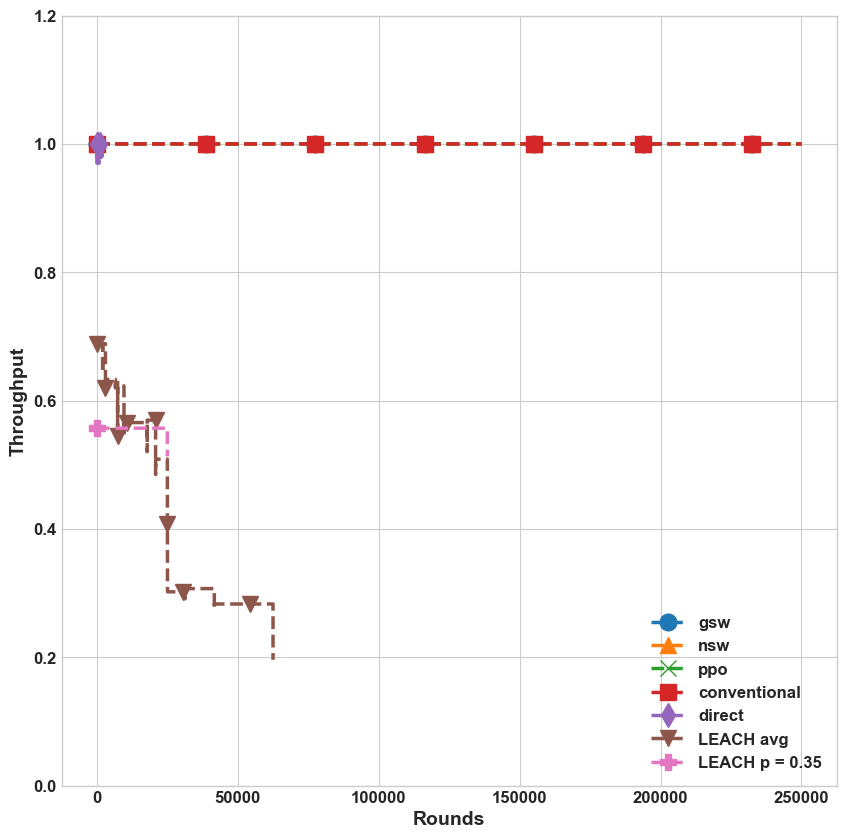

In [92]:
plt.figure(figsize=(10,10))
plt.rcParams.update(font)
for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['throughput']))]
	y = [x[-1] for x in l['throughput']]
	# print(path['label'], len(x), len(l['latency']))
	plt.plot(x,y, marker = path['marker'], lw=2.5, markersize=12, label = path['label'], markevery=0.1, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-fl"]
l = np.load(p, allow_pickle=True).item()
x = [i for i in range(len(l['throughput']))]
y = [x[-1] for x in l['throughput']]
plt.plot(x, y, marker = 'd', lw=2.5, markersize=12,label = "direct", markevery=0.75, linestyle = 'dashed')


P = [0.03, 0.3, 0.7, 0.07, 0.35, 0.45]
P.sort()
l = []
for p in P:
	path = "results/conventional/result/leach/"+ str(p) + "/fl-performance.npy"
	# l = np.load(p, allow_pickle=True).item()
	y = np.load(path, allow_pickle=True).item()
	yhat = [x[-1] for x in y['throughput']]
	l.append(yhat)
	# l.append(df['latency'].values.tolist())
	# l.append([x[-1] for x in df['throughput'].values.tolist()])
	# plt.plot(l[-1], label = str(p))

outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, marker = 'v', lw=2.5, markersize=12,linestyle = 'dashed', label = "LEACH avg", markevery = 0.1)
plt.plot(l[4], marker='P',lw=2.5, markersize=12, linestyle = 'dashed', label='LEACH p = 0.35', markevery = 0.75)

plt.xlabel("Rounds", weight = "bold", fontsize=14)
plt.ylabel("Throughput", weight = "bold", fontsize=14)
# plt.title("Throughput v/s rounds in Federated Learning")
plt.ylim(0, 1.2)
plt.legend()
plt.savefig(fname="results/final/Throughput-fl.png", format="png")
plt.savefig(fname="results/final/eps/Throughput-fl.eps", format="eps")


TEST

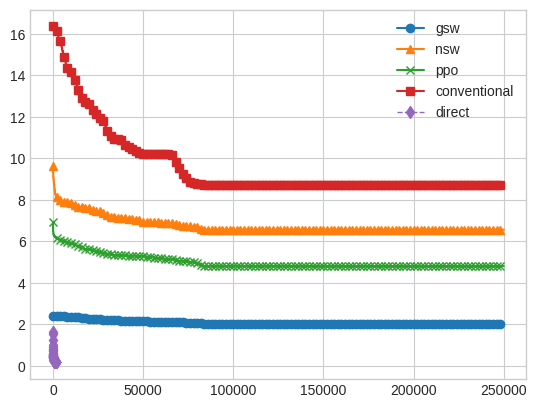

In [20]:
for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['latency']))]
	plt.plot(l['latency'], marker=path['marker'], label = path['label'], markevery =2000)
path = paths[-1]
p = path["ppath"] + path["direct-fl"]
df = np.load(p, allow_pickle=True).item()
# x = np.linspace(0, 1755, 1755)
plt.plot(df['latency'], marker = 'd', lw=1,label = "direct", markevery=15, linestyle = 'dashed')
plt.legend()

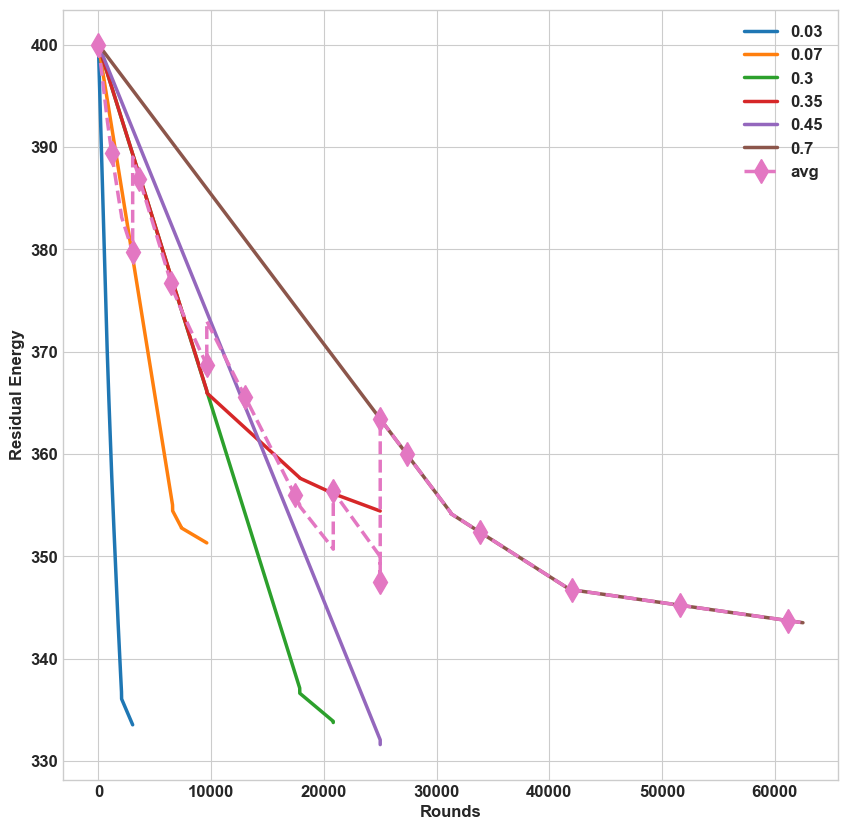

In [96]:
P = [0.03, 0.3, 0.7, 0.07, 0.35, 0.45]
P.sort()
plt.figure(figsize=(10,10))
plt.rcParams.update(font)
l = []
for p in P:
	path = "results/conventional/result/leach/"+ str(p) + "/fl-performance.npy"
	df = pd.DataFrame(np.load(path, allow_pickle=True).item())
	l.append(df['energy'].values.tolist())
	# l.append([x[-1] for x in df['throughput'].values.tolist()])
	plt.plot(l[-1], label = str(p),lw=2.5, markersize=12)
from itertools import zip_longest
outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, marker = 'd', lw=2.5, markersize=12,linestyle = 'dashed', label = "avg", markevery = 0.1)
plt.ylabel("Residual Energy",weight = "bold", fontsize=12)
plt.xlabel("Rounds",weight = "bold", fontsize=12)
# plt.title('LEACH results with average')
plt.legend()
plt.savefig("results/final/LEACH results with average.png", format = "png")
plt.savefig("results/final/eps/LEACH results with average.eps", format = "eps")

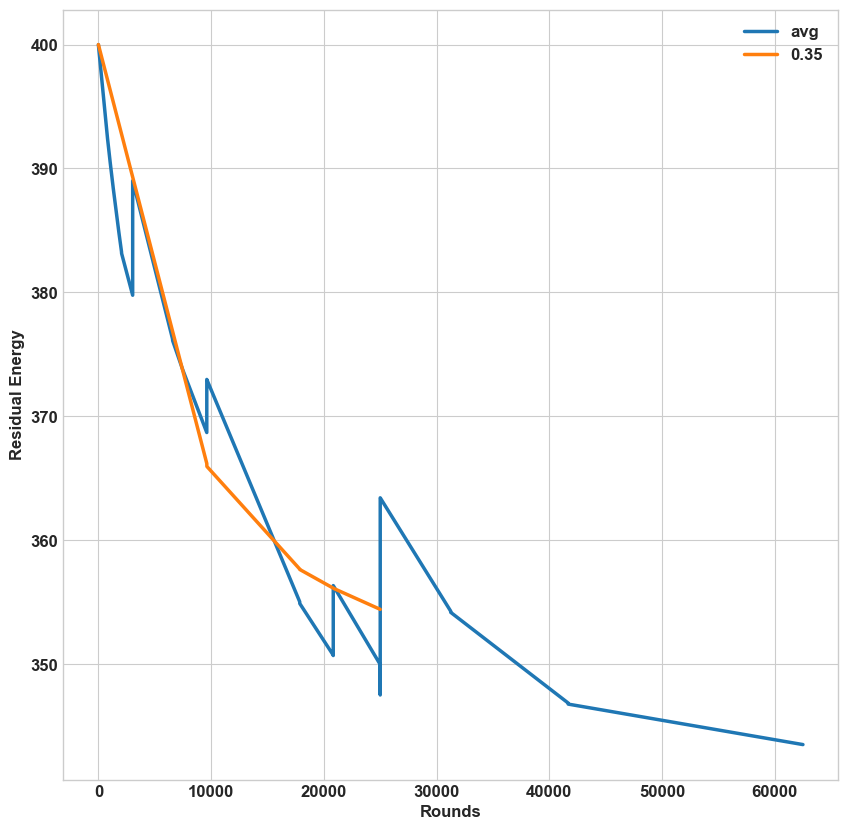

In [97]:
from itertools import zip_longest
plt.rcParams.update(font)
plt.figure(figsize=(10,10))
outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, label = "avg",lw=2.5, markersize=12)

path = "results/conventional/result/leach/"+ str(0.35) + "/fl-performance.npy"
df = pd.DataFrame(np.load(path, allow_pickle=True).item())
l.append([x[-1] for x in df['throughput'].values.tolist()])
plt.plot(df['energy'], label = "0.35",lw=2.5, markersize=12)
plt.ylabel("Residual Energy", weight = "bold", fontsize=12)
plt.xlabel("Rounds", weight = "bold", fontsize=12)
# plt.title('LEACH results with average')
plt.legend()
plt.savefig("results/final/LEACH results P =0.35 with average.png", format = "png")
plt.savefig("results/final/eps/LEACH results P =0.35with average.eps", format = "eps")

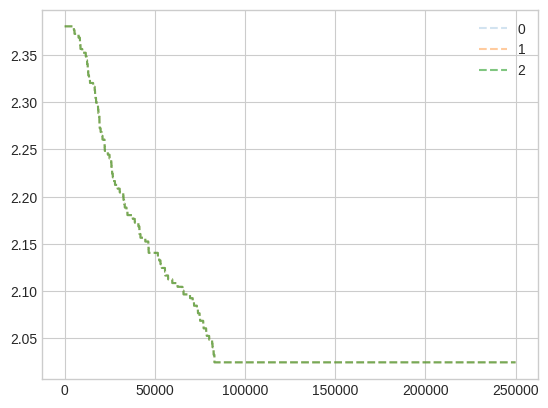

In [23]:
for i in range(0,3):
	p="results/gsw-ppo/result/multihop/" + str(i) + "-performance.npy"
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['latency']))]
	
	plt.plot(l['latency'], label = str(i), linestyle = 'dashed', alpha = 0.2*(i+1))
plt.legend()

In [24]:
l = np.load(paths[-1]['ppath'] + paths[-1]["direct-fl"], allow_pickle=True).item()
l

{'lifetime': 1755,
 'energy': [391.9715685834147,
  383.9431371668295,
  375.9147057502441,
  367.8862743336587,
  359.85784291707364,
  351.8294115004886,
  343.80098008390297,
  335.77254866731755,
  327.74411725073253,
  319.7597939953649,
  312.0625427406975,
  304.62457841033944,
  297.5159114320339,
  290.68298542176683,
  284.11119023901966,
  277.7567058937481,
  271.67867104991046,
  265.7879071213554,
  260.2495766144272,
  254.92891480842613,
  249.88724189168826,
  245.0018216709796,
  240.19746964833135,
  235.53705636357358,
  231.0231057810288,
  226.62238390277665,
  222.3596288846121,
  218.2970995343581,
  214.44900409455462,
  210.8757377335098,
  207.42562786612146,
  204.21063279219334,
  201.14021777092674,
  198.27327250871883,
  195.50051798381364,
  192.8231985931048,
  190.17939855402446,
  187.57986018329404,
  185.06023091135924,
  182.66392439858294,
  180.41974201317697,
  178.21383881055525,
  176.05497209477733,
  173.974946318614,
  171.98185004011017,


In [25]:
from network import *
net1 = network(50,50,10,0,0)
net1.initialise_nodes(0.25,0)
net1.set_parameters(2000, 8, 2000, 3*1e8, 5)
net1.set_nxg()
net1.show_graph()

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
net = net1
e = 0
for Node in net.node_list:
	Node.critical_energy = 0.0
	e += Node.current_energy

In [ ]:
net.packet_length = 1024
sink = net.sink
dead_node = set()
k = net.packet_length
rnds = 0

In [ ]:
er = sink.energy_for_reception(k)
n = net.number_of_nodes
n_map = net.node_map
net.calculate_latency()
lm = net.latency_matrix
dm = net.calculate_dist()
energy_per_round = [e]
latency_per_round = []
throughput_per_round = []
total_latency = 0

In [ ]:
from networkx import NetworkXError
while len(dead_node) < 0.9*n:
	message_gen = n - len(dead_node)
	s_trans = 0
	e = 0
	l = 0
	failed_msg = 0
	for node in net.node_list:
		if node in dead_node:
			continue
		path = nx.shortest_path(net.nxg, 0, node.id)
		path.reverse()
		curr = net.node_map[path.pop()]
		fail = 0
		while len(path) != 0:
			next = net.node_map[path.pop()]
			if next.current_energy < next.critical_energy or curr.current_energy < curr.critical_energy:
				fail = 1
				break
			l += lm[curr.id][next.id]
			curr.current_energy -= curr.energy_for_transmission(k, next.dist(curr))
			next.current_energy -= er
			curr = next
		if curr != sink or fail == 1:
			et = node.energy_for_transmission(k, dm[node.id][sink.id])
			if et > node.current_energy:
				failed_msg += 1
				dead_node.add(node)
				try:
					net.nxg.remove_node(node)
				except NetworkXError:
					print(node.id)
			else:
				node.current_energy -= et
				s_trans += 1
				continue
	for node in net.node_list:
		e += max(node.current_energy, node.critical_energy)
		if node.current_energy <= node.critical_energy:
			dead_node.add(node)
			
	latency_per_round.append(l)
	energy_per_round.append(e)
	throughput_per_round.append([message_gen, s_trans, s_trans/message_gen, failed_msg])
	total_latency+= l
	e = 0
	l = 0
	s_trans = 0
	failed_msg=0
	rnds += 1

2
6
5
10
3
7
8
9


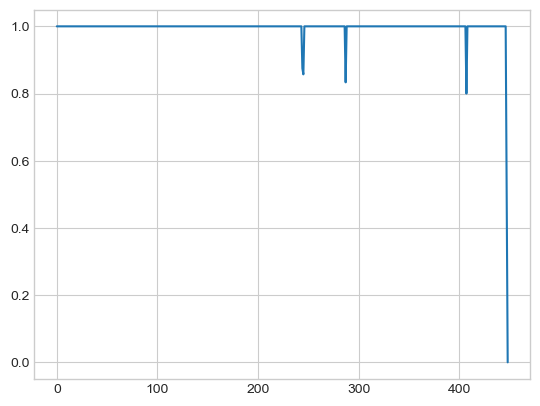

In [ ]:
plt.plot([x[-2] for x in throughput_per_round])

In [47]:
from numpy.random import normal 
cnt = 10
for _ in range(2):
	x = normal(0, 0.5, cnt)
	cnt = 0
	for i in range(len(x)):
		x[i] = round(x[i], 2)
		if x[i] <= 0.96 and x[i] >= -0.96:
			cnt += 1
	# print(x)
	
	print(cnt)

8
6


(array([ 2.,  3.,  7., 12., 27., 21., 14.,  7.,  4.,  3.]),
 array([ 9.48980709, 10.61136403, 11.73292097, 12.85447791, 13.97603485,
        15.09759179, 16.21914873, 17.34070567, 18.46226261, 19.58381955,
        20.70537649]),
 <BarContainer object of 10 artists>)

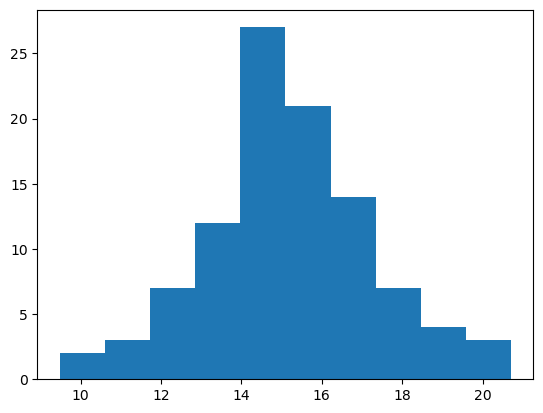

In [50]:
import matplotlib.pyplot as plt
x = normal(15, 2, 100)
plt.hist(x)

In [44]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [45]:
X = get_truncated_normal(17, 3, 0, 22)


In [46]:
X.rvs()


20.21781456275857

In [66]:
from network import *
net = network(500, 500, 400, 0, 0)
path = "results/network_data/network1network_data.npy"
parent_dir = "results/conventional/"

graph_data = net.load_network(path, 1)

{'area_x': 500, 'area_y': 500, 'number_of_nodes': 400, 'base_x': 0, 'base_y': 0, 'node_initial_energy': 1, 'node_critical_energy': 0.4, 'dist_para': 2000, 'len_of_packets': 200, 'transmission_rate': 2000, 'speed_of_transmission': 300000000.0, 'radio_distance': 50}


In [67]:
# net.nxg.remove_node(1)
path = nx.shortest_path(net.nxg, 338, 0)
path

[338, 293, 253, 255, 211, 171, 129, 86, 85, 45, 7, 1, 0]

graph plotted!


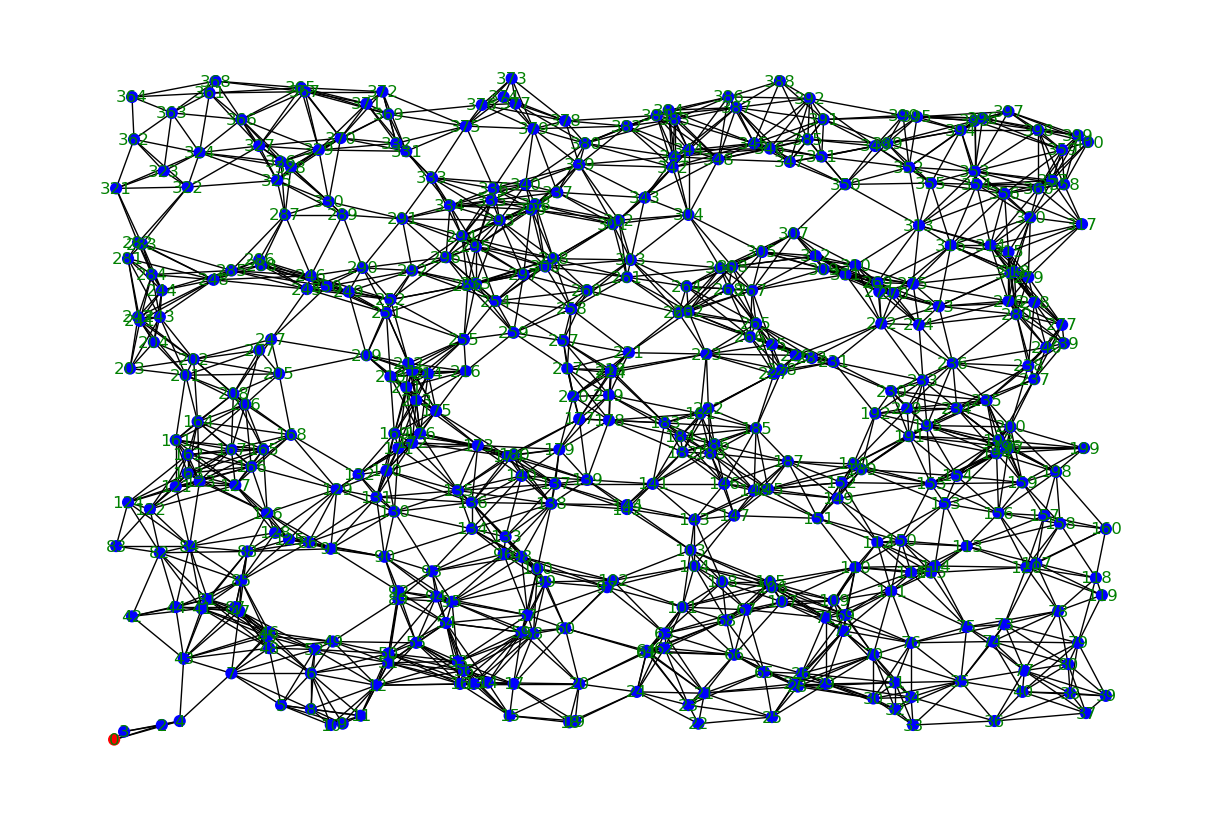

In [65]:
net.show_graph()

In [75]:
p = "results/conventional/multihop-drop/cl-performance.npy"
df = np.load(p, allow_pickle=True).item()
df['throughput']

[[40000, 0, 0.0],
 [40000, 0, 0.0],
 [40000, 0, 0.0],
 [40000, 0, 0.0],
 [40000, 0, 0.0],
 [40000, 0, 0.0],
 [39900, 0, 0.0],
 [39800, 0, 0.0],
 [39800, -454, -0.011],
 [37200, -3395, -0.091]]

graph plotted!


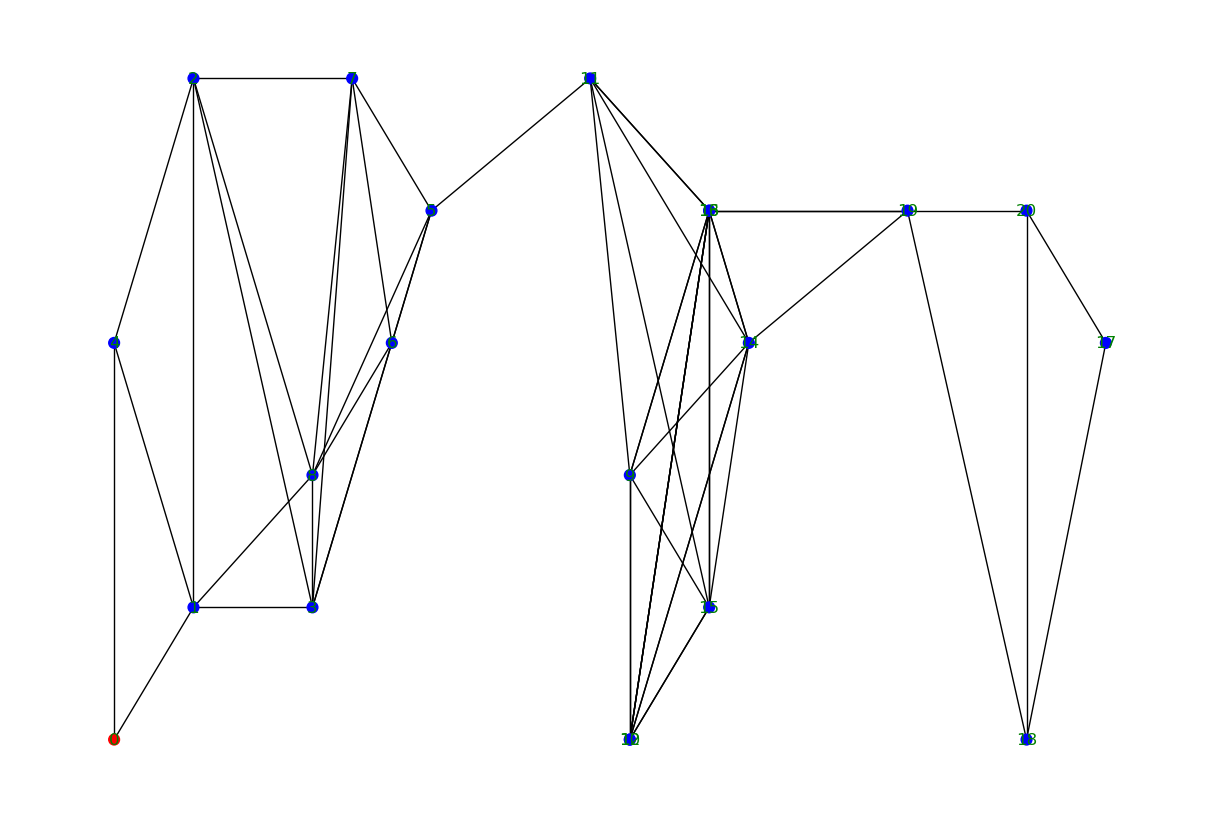

In [1]:
from network import *
from node import *
import math

net = network(50,50,20,0,0)
net.initialise_nodes(0.25,0)
net.set_parameters(2000, 256, 2000, 3*1e8, 5)
net.set_nxg()
net.show_graph()

net.packet_length=256
packets=100

for n in net.node_list:
	n.critical_energy = 0.0
	n.set_packets(packets)
	
sink = net.sink
dead_nodes = set()
k = net.packet_length
N = net.number_of_nodes
rnds=0
er = sink.energy_for_reception(k)
net.calculate_latency()
lm=net.latency_matrix
dm=net.calculate_dist()
e_rounds = []
l_rounds = []
th_rounds = []
live_nodes = []

In [2]:
hist = []

def drop_packs(trasn_packs):
	return max(math.floor(normal(trasn_packs*0.07, 2)),0)

def node2NodeTransmission(curr, next):
	et = curr.energy_for_transmission(k, next.dist(curr))
	transferred_packets = min(curr.packets_this_rnd, math.ceil(curr.current_energy/et))
	curr.current_energy -= (transferred_packets*et)
	print( et * transferred_packets, ' J ', curr.current_energy)
	dropped_p = drop_packs(transferred_packets)
	hist.append([transferred_packets, dropped_p])
	received_packets = max(transferred_packets - dropped_p, 0)
	next.current_energy -= (received_packets*er)
	next.packets_this_rnd += received_packets
	return received_packets*lm[curr.id][next.id]

def add_dead_node(c):
	if c.current_energy < c.critical_energy:
		dead_nodes.add(c.id)
		try:
			net.nxg.remove_node(Node.id)
		except:
			pass
	return c.current_energy < c.critical_energy

In [3]:
ch_msg = {}
ch = {}
clusters_count = 0
failed_itr_per_node = {}

#setting distance from server in every node:
for Node in net.node_list:
	Node.dist(sink)
	Node.setup_for_leach()
	failed_itr_per_node[Node] = 0
	ch_msg[Node] = 0
	
P = 0.2
failed_iterations = 0
clusters = []

In [4]:
#Node advertisement & cluster head selection
for Node in net.node_list:
	Node.role = 0
	Tn = P/(1 - P*(rnds % int(1/P)))
	response = random.uniform(0,1)
	if response < Tn:
		Node.role = 1
		Node.clusterID = clusters_count
		clusters.append({Node})
		ch[clusters_count] = Node
		clusters_count += 1
		
for Node in net.node_list:
	if Node.role == 0:
		Node.dist_to_head = 1e9
		for i in range(clusters_count):
			head = ch[i]
			d = Node.dist(head)
			if Node.dist_to_head != min(Node.dist_to_head, d):
				Node.dist_to_head = d
				Node.clusterID = i
		clusters[Node.clusterID].add(Node)

nodes_not_participating = len(dead_nodes)

In [5]:
while len(dead_nodes) < 0.9*N:
	message_gen = (N - len(dead_nodes))*packets
	e=0
	l=0
	sink.packets_this_rnd=0
	
	for Node in net.node_list:
		if Node.id in dead_nodes:
			continue
		Node.set_packets(packets)
		
	for i in range(clusters_count):
		head = ch[i]
		for member in clusters[i]:
			if member.role == 0 and member not in dead_nodes:
				l+=node2NodeTransmission(member, head)
				add_dead_node(member)
		l+=node2NodeTransmission(head, sink)
		add_dead_node(head)
		
	e += max(Node.current_energy, Node.critical_energy)
	l_rounds.append(l)
	e_rounds.append(e)
	th_rounds.append([message_gen, sink.packets_this_rnd, round(sink.packets_this_rnd/message_gen, 3)])
	live_nodes.append(N - len(dead_nodes))
	rnds += 1


0.012818593344000002  J  0.237181406656
0.012820502784000003  J  0.23717949721599998
0.012806390784000001  J  0.237193609216
0.012805125696000003  J  0.237194874304
0.012810240000000002  J  0.23718976
0.012805760000000001  J  0.23719424
0.08526938701824001  J  0.09228261298176
0.012803211264  J  0.237196788736
0.012805125696000003  J  0.237194874304
0.012805125696000003  J  0.237194874304
0.012806390784000001  J  0.237193609216
0.06106747099200001  J  0.141188529008
0.012810863616000001  J  0.237189136384
0.025041830400000003  J  0.2129261696
0.012800000000000002  J  0.2372
0.025170912  J  0.212669088
0.012810240000000002  J  0.23718976
0.012816000000000003  J  0.237184
0.012808340544000001  J  0.237191659456
0.050542147165440005  J  0.16348985283456
0.012818593344000002  J  0.22436281331199998
0.012820502784000003  J  0.22435899443199997
0.012806390784000001  J  0.224387218432
0.012805125696000003  J  0.22438974860799998
0.012810240000000002  J  0.22437952
0.012805760000000001  J  0.2

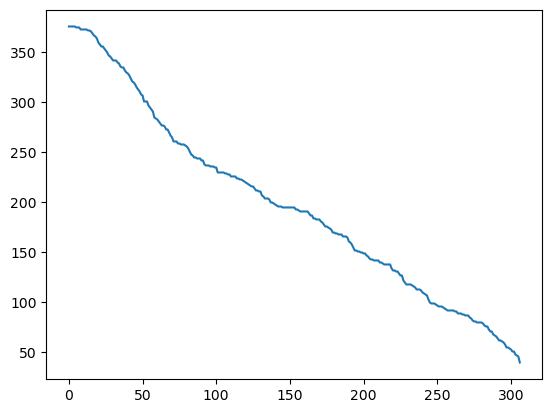

In [22]:
# plt.plot([t[-1] for t in th_rounds])
plt.plot(live_nodes)

In [51]:
# Direct CODE

from network import *
from node import *
import network as nx
import math

def drop_packs(trasn_packs):
	return max(math.floor(normal(trasn_packs*0.07, 2)),0)

def node2NodeTransmission(curr, next):
	et = curr.energy_for_transmission(k, next.dist(curr))
	transferred_packets = min(curr.packets_this_rnd, math.ceil(curr.current_energy/et))
	curr.current_energy -= (transferred_packets*et)
	dropped_p = drop_packs(transferred_packets)
	received_packets = max(transferred_packets - dropped_p, 0)
	next.current_energy -= (received_packets*er)
	next.packets_this_rnd += received_packets
	return received_packets*lm[curr.id][next.id]

net = network(500, 500, 400, 0, 0)
path = "results/network_data/network1network_data.npy"
parent_dir = "./results/conventional/result"
gd=net.load_network(path,1)


net.packet_length=128
packets=50

for n in net.node_list:
	n.curent_energy= 25
	n.critical_energy = 0.0
	n.set_packets(packets)

dead_nodes=set()
N = net.number_of_nodes
k = net.packet_length
sink = net.sink
rnd = 0
net.calculate_latency()
lm = net.latency_matrix
e_r = []
l_r = []
th_r = []
avg_lat_r = []
live_nodes = []
rnds=0

total_latency=0
rnd_latency=0
er = sink.energy_for_reception(k)

while len(dead_nodes) < 0.9*N:
	message_gen = (N - len(dead_nodes))*packets
	e=0
	l=0
	sink.packets_this_rnd=0
	for Node in net.node_list:
		if Node.id in dead_nodes:
			continue
		Node.set_packets(packets)
		try:
			path=nx.shortest_path(net.nxg, Node.id, 0)
		except:
			pass
		finally:
			l+= node2NodeTransmission(Node,sink)
			if Node.current_energy < Node.critical_energy:
				dead_nodes.add(Node.id)
				net.nxg.remove_node(Node.id)
		e += max(Node.current_energy, Node.critical_energy)
	l_r.append(l)
	e_r.append(e)
	th_r.append([message_gen, sink.packets_this_rnd, round(sink.packets_this_rnd/message_gen, 3)])
	live_nodes.append(N - len(dead_nodes))
	rnds += 1

print(rnds)

{'area_x': 500, 'area_y': 500, 'number_of_nodes': 400, 'base_x': 0, 'base_y': 0, 'node_initial_energy': 1, 'node_critical_energy': 0.4, 'dist_para': 2000, 'len_of_packets': 200, 'transmission_rate': 2000, 'speed_of_transmission': 300000000.0, 'radio_distance': 50}
3


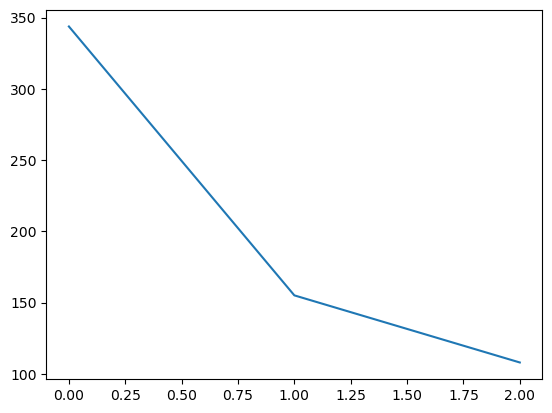

In [52]:
# plt.plot([t[-1] for t in th_rounds])
plt.plot(l_r)
# plt.plot(e_r)

In [23]:
rnds

3

graph plotted!


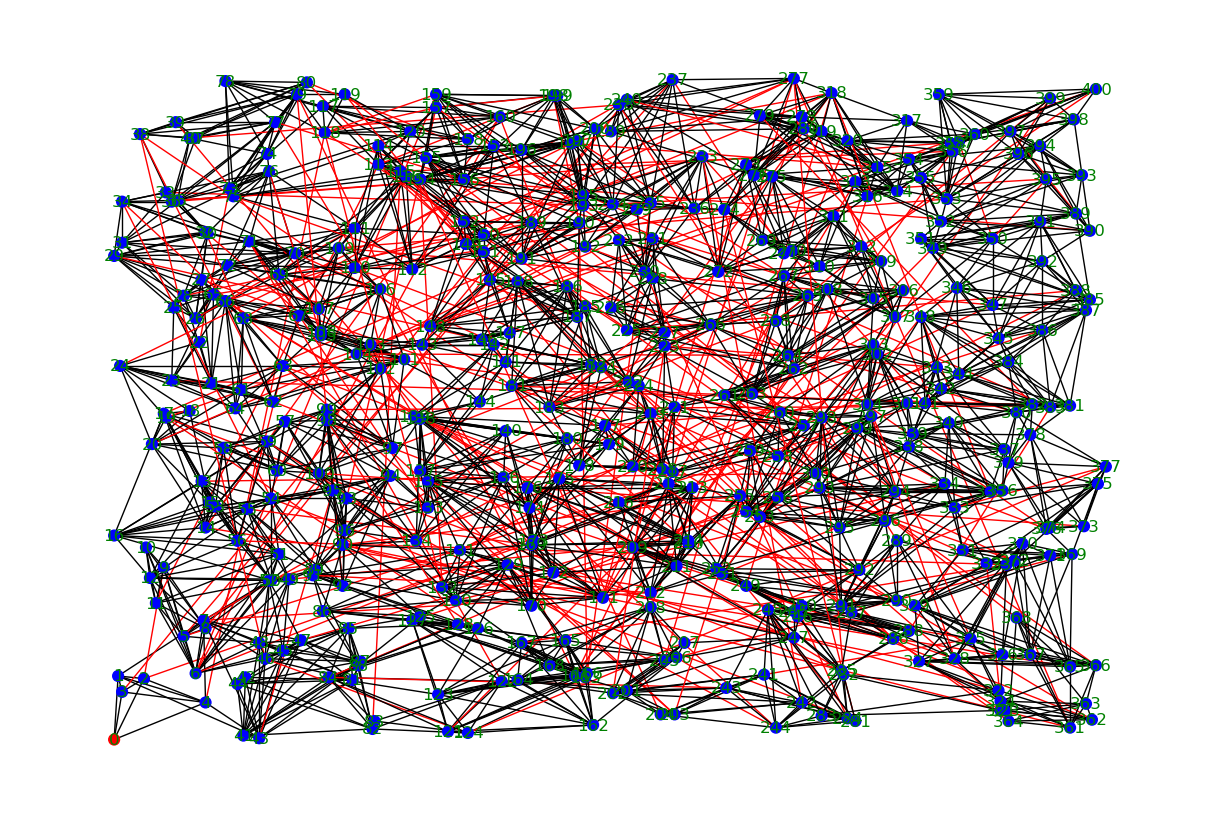

51


In [54]:
from network import *
import math
from numpy.random import normal
from networkx.exception import NetworkXNoPath

hist = []
def drop_packs(trasn_packs):
	return max(math.floor(normal(trasn_packs*0.07, 2)),0)

def node2NodeTransmission(curr, next):
	et = curr.energy_for_transmission(k, next.dist(curr))
	transferred_packets = min(curr.packets_this_rnd, math.ceil(curr.current_energy/et))
	curr.current_energy -= (transferred_packets*et)
	dropped_p = drop_packs(transferred_packets)
	hist.append([transferred_packets, dropped_p])
	received_packets = max(transferred_packets - dropped_p, 0)
	next.current_energy -= (received_packets*er)
	next.packets_this_rnd += received_packets
	return received_packets*lm[curr.id][next.id]

def add_dead_node(c):
	if c.current_energy < c.critical_energy:
		dead_nodes.add(c.id)
		try:
			net.nxg.remove_node(Node.id)
		except:
			pass
	return c.current_energy < c.critical_energy

net = network(500, 500, 400, 0, 0)
path = "results/ppo/result/0-graph_data.npy"
parent_dir = "results/fsw-ppo/"
graph_data = net.load_network(path, 0)
net.show_graph()
#initialises node

#initial residual energy:
net.packet_length=128
packets = 50

for n in net.node_list:
	n.current_energy = 25
	n.critical_energy = 0.0
	n.set_packets(packets)


dead_nodes = set()
N = net.number_of_nodes
k = net.packet_length
sink = net.sink
net.calculate_latency()
er = sink.energy_for_reception(k)
lm=net.latency_matrix
dm=net.calculate_dist()
e_r = []
l_r= []
th_r= []
live_nodes = []
rnds=0

while len(dead_nodes) < 0.9*N:
	message_gen = (N - len(dead_nodes))*packets
	e=0
	l=0
	sink.packets_this_rnd=0
	for Node in net.node_list:
		if Node.id in dead_nodes:
			continue
		Node.set_packets(packets)
		try:
			path=nx.shortest_path(net.nxg, Node.id, 0)
			path.reverse()
			while len(path) != 2:
				c = net.node_map[path.pop()]
				n = net.node_map[path[-1]]
				l += node2NodeTransmission(c, n)
				add_dead_node(c)
				if add_dead_node(n):
					break
		except:
			path=[0,Node.id]
		finally:
			curr = net.node_map[path.pop()]
			sink = net.node_map[path[-1]]
			l+= node2NodeTransmission(Node,sink)
			add_dead_node(Node)
		e += max(Node.current_energy, Node.critical_energy)
	l_r.append(l)
	e_r.append(e)
	th_r.append([message_gen, sink.packets_this_rnd, round(sink.packets_this_rnd/message_gen, 3)])
	live_nodes.append(N - len(dead_nodes))
	rnds += 1

print(rnds)

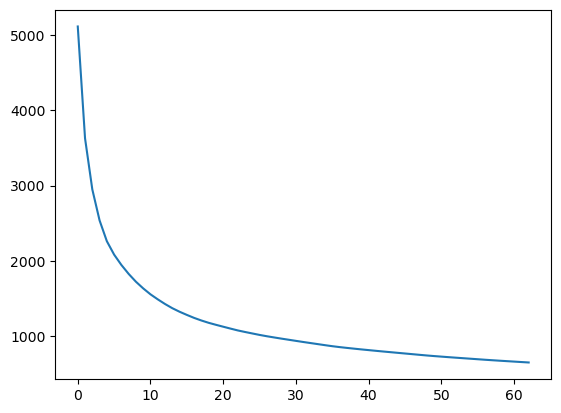

In [46]:
plt.plot(e_r)
# e_r

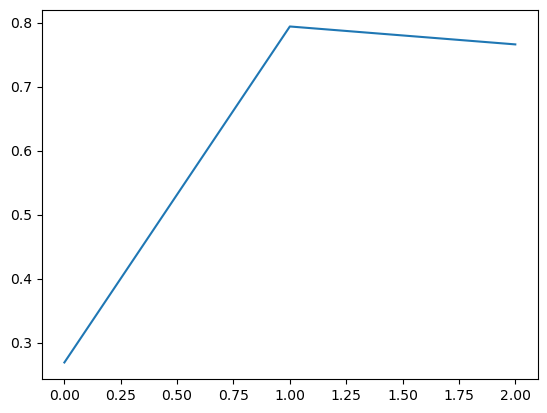

In [53]:
plt.plot([t[-1] for t in th_r])

graph plotted!


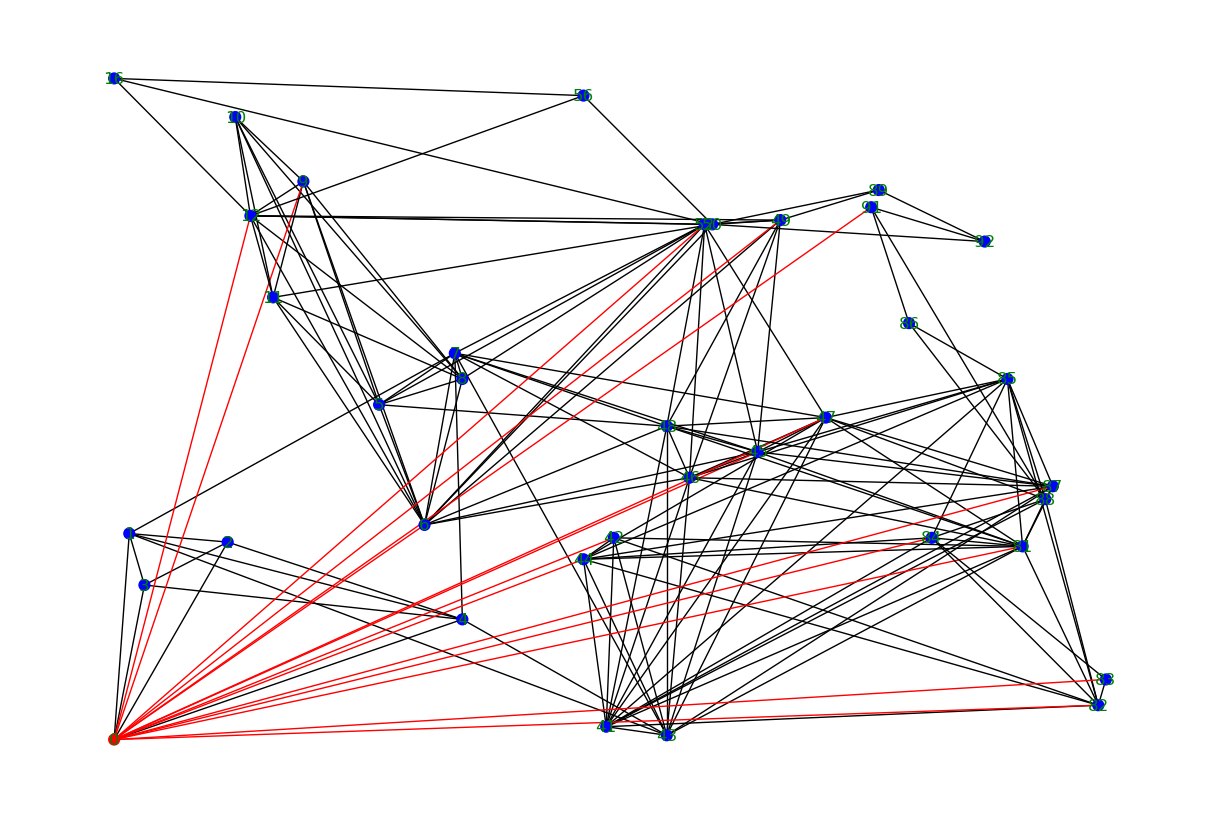

In [26]:
net.show_graph()